# Titanic. A learning journey

## Introduction
This is a mix that I'm learning from different Titanic noteboks. The main inspiratiors are

* [Titanic Survival Predictions (Beginner)](https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner)
* [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)

Contents: Import Necessary Libraries Read In and Explore the Data Data Analysis Data Visualization Cleaning Data Choosing the Best Model Creating Submission File Any and all feedback is welcome!

## Table of Contents
1. [Define the problem](#ch1)
1. [Read the data](#ch2)
1. [Discover correlations](#ch3)
1. [Guess the missing ages](#ch4)

<a id="ch1"></a>

## 1. Define the problem

First thing first. What we are trying to do? 

Titanic. Belfast 1912. The largest ship ever made was struck by an iceberg and sank in his maiden vollage. Safety deficencies caused that more tan 1,500 of the 2,224. Our task is guess if a passenger will survive or not.

Well, let's do it 

<a id="ch2"></a>


## 2. Read the data

To start we begin reading and exploring the data 


In [167]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import train and test CSV files
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

#take a look at the training data
print (train.info())
train.describe(include="all")

from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

# A small utility to see correlation
def ShowCorrelation (property, ax = None):
    if ax is None:
        fig, ax = plt.subplots(1, 1,figsize=(8,6))

    sns.pointplot(x=property, y=SURVIVED, data=train, ax = ax )
    print (train[[SURVIVED,property]].groupby(property, as_index=False).agg(['count', 'mean']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [168]:
# A quick lock to the content
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
# Where there are missing values
missingTrain = pd.isnull(train).sum()
print (missingTrain[missingTrain>0])
missingTest = pd.isnull(test).sum()
print (missingTest[missingTrain>0])


Age         177
Cabin       687
Embarked      2
dtype: int64
Age          86
Cabin       327
Embarked      0
dtype: int64


### Data recap

   Well, after doig a first look to the data. What we can say?

   * PassengerId: Id of the passenger, doesn't seems relevant
   * Survived: What we want to know (0/1)
   * Pclass: A proxy for SES(Socio-Economic status) (1/2/3). 
   * Name: String with the name. Could we extract some information from here? 
   * Sex: Descriptior of the sex (male/female)
   * Age: Age of the person. It seemsimportat but we have a lot of nulls. We have to found an strategy assign this number
   * SibSp: Number of siblings spouses abroad  (0- 8)
   * Parch: Number of parent children abroad (0 - 9)
   * Ticket: String Id of the ticket
   * Fare: Passenger Fare
   * Cabin: Cabin used. A lot of nulls
   * Embark: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). There are 2 for 891 without this data. We can assign to the more used
  
      

   First thoughts

   * PClass is a integer but could make sense to tranform to a category?
   * Name + SibSp + Parch + ticket + cabin. Could be used to identify families? 

<a id="ch3"></a>
## Discover correlations
  
    First we will try to discover correlations between values and result



In [170]:
SURVIVED = "Survived"
for x in train:
    if ((x != SURVIVED) and (train[x].unique().size <=10)):
        print (x, ": ", train[x].unique().size)
        print (train[[SURVIVED,x]].groupby(x, as_index=False).agg(['count', 'mean']))


Pclass :  3
       Survived          
          count      mean
Pclass                   
1           216  0.629630
2           184  0.472826
3           491  0.242363
Sex :  2
       Survived          
          count      mean
Sex                      
female      314  0.742038
male        577  0.188908
SibSp :  7
      Survived          
         count      mean
SibSp                   
0          608  0.345395
1          209  0.535885
2           28  0.464286
3           16  0.250000
4           18  0.166667
5            5  0.000000
8            7  0.000000
Parch :  7
      Survived          
         count      mean
Parch                   
0          678  0.343658
1          118  0.550847
2           80  0.500000
3            5  0.600000
4            4  0.000000
5            5  0.200000
6            1  0.000000
Embarked :  4
         Survived          
            count      mean
Embarked                   
C             168  0.553571
Q              77  0.389610
S             644

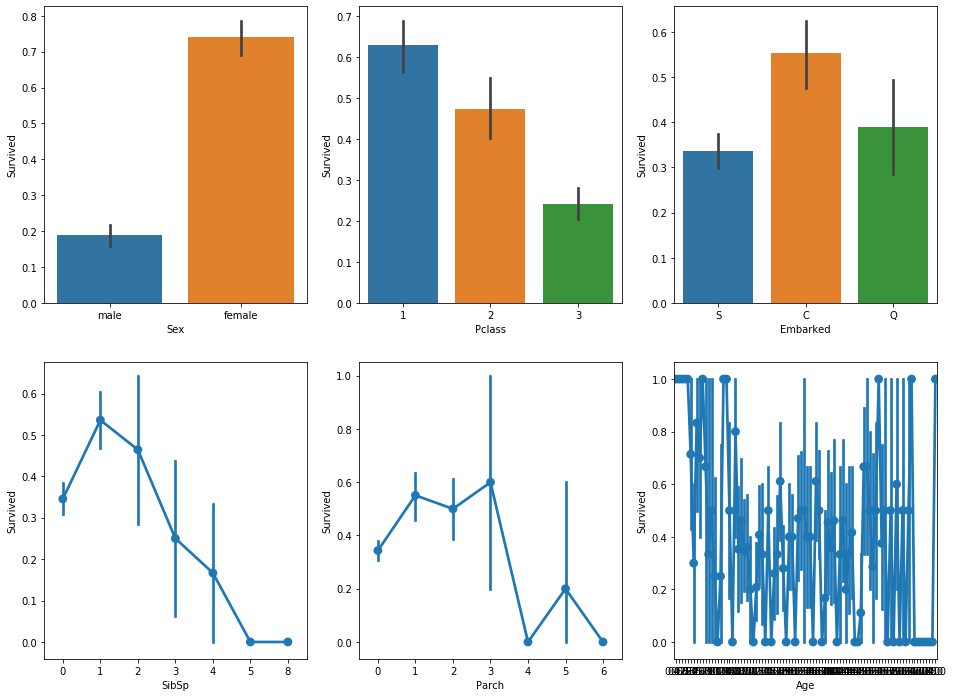

In [171]:
#draw a bar plot of survival by sex
SEX = "Sex";
PCLASS = "Pclass";
EMBARKED = "Embarked";
SIBSP = "SibSp";
PARCH = "Parch";
AGE = "Age";
fig, saxis = plt.subplots(2, 3,figsize=(16,12))
sns.barplot(x=SEX, y=SURVIVED, data=train, ax =saxis[0,0])
sns.barplot(x=PCLASS, y=SURVIVED, data=train, ax =saxis[0,1])
sns.barplot(x=EMBARKED, y=SURVIVED, data=train,order=['S','C','Q'], ax=saxis[0,2])
sns.pointplot(x=SIBSP , y=SURVIVED,  data=train, ax = saxis[1,0])
sns.pointplot(x=PARCH , y=SURVIVED,  data=train, ax = saxis[1,1])
sns.pointplot(x=AGE , y=SURVIVED,  data=train, ax = saxis[1,2])

Well, this is interesting for what it says and for what is missig.
Class, sex are very important
also it seems that there are a correlation between size of the family (Parch, sibSp) and probabilities of supervivence
what is missing is the age, as is provided is not very useful. We will arrange the age as it is in the notebook of LD Freeman, and by the way, it seems that he is also doing a interesting thing as is extract the Title form the name. Ok, let's do it 

<a id="ch4"></a>
##Guess the missing ages

In [172]:
# what we have for title is this
train['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
test['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

# as the titles seems related with the age, we can use to fill the age that is missing

AverageAgeByTitle = train[['Title',AGE]].groupby('Title', as_index=False).mean();
AverageAgeByTitle.reset_index(inplace=True);
print(AverageAgeByTitle);

index         Title        Age
0       0          Capt  70.000000
1       1           Col  58.000000
2       2           Don  40.000000
3       3            Dr  42.000000
4       4      Jonkheer  38.000000
5       5          Lady  48.000000
6       6         Major  48.500000
7       7        Master   4.574167
8       8          Miss  21.773973
9       9          Mlle  24.000000
10     10           Mme  24.000000
11     11            Mr  32.368090
12     12           Mrs  35.898148
13     13            Ms  28.000000
14     14           Rev  43.166667
15     15           Sir  49.000000
16     16  the Countess  33.000000


In [173]:
# guess the age 
PASSENGER_ID= "PassengerId"
TITLE = "Title"
df = train[[PASSENGER_ID, TITLE, AGE]].merge(AverageAgeByTitle, on=TITLE, how='left');
train[AGE][train[AGE].isnull()]=df['Age_y']

df = test[[PASSENGER_ID, TITLE, AGE]].merge(AverageAgeByTitle, on=TITLE, how='left');
test[AGE][test[AGE].isnull()]=df['Age_y']


In [174]:

#Survived: What we want to know (0/1)
#Pclass: A proxy for SES(Socio-Economic status) (1/2/3).
#Name: String with the name. Could we extract some information from here?
#Sex: Descriptior of the sex (male/female)
#Age: Age of the person
#SibSp: Number of siblings spouses abroad (0- 8)
#Parch: Number of parent children abroad (0 - 9)
#Ticket: String Id of the ticket
#Fare: Passenger Fare
#Cabin: Cabin used. A lot of nulls
#Embark: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

from sklearn.preprocessing import OneHotEncoder


NAME = "Name"
FARE = "Fare"
train.drop([PASSENGER_ID, NAME, FARE]), axis=1, inplace=True);
test.drop([PASSENGER_ID, NAME, FARE], axis=1, inplace=True);

# Fill NA
train[EMBARKED].fillna(train[EMBARKED].mode()[0], inplace = True)
test[EMBARKED].fillna(test[EMBARKED].mode()[0], inplace = True)

# One Hot Encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
categories = [SEX, EMBARKED]

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[categories]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test[categories]))

# Remove categorical columns (will replace with one-hot encoding)
train.drop(categories, axis=1)
test.drop(categories, axis=1)

# Add one-hot encoded columns to numerical features
train = pd.concat([train, OH_cols_train], axis=1)
test = pd.concat([test, OH_cols_test], axis=1)


Survived          
                 count      mean
AgeBin                          
(-0.08, 16.0]      104  0.548077
(16.0, 32.0]       503  0.328032
(32.0, 48.0]       204  0.436275
(48.0, 64.0]        69  0.434783
(64.0, 80.0]        11  0.090909


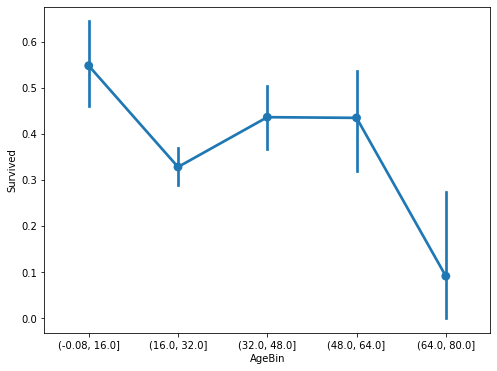

In [175]:

AGEBIN = 'AgeBin'
#Age
train[AGEBIN] = pd.cut(train[AGE].astype(int), 5)
test[AGEBIN] = pd.cut(test[AGE].astype(int), 5)
ShowCorrelation (AGEBIN);

FAMILY_SIZE = 'FamilySize'
train[FAMILY_SIZE] = train[SIBSP] + train[PARCH]
test[FAMILY_SIZE] = train[SIBSP] + train[PARCH]



In [178]:
#fig, saxis = plt.subplots(1, 3,figsize=(8,12))
#ShowCorrelation (SIBSP, saxis[0]);
#ShowCorrelation (PARCH, saxis[1]);
#ShowCorrelation (FAMILY_SIZE, saxis[2]);


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.754659    0.523008   
std     257.353842    0.486592    0.836071   13.277179    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.773973    0.000000   
50%     446.000000    0.000000    3.000000   30.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.898148    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare           0           1           2           3  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.381594   32.204208    0.352413    0.647587    0.188552    0.086420   
std      0.806057   49.693429    0.477990    0.477990    0.391372    0.281141   
min      0.000000    0.000000    0.000000    0.00000

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

randomforest = RandomForestClassifier()
randomforest.fit(train, y_train)

In [177]:
# 1. Create the transformer steps and bundle it
#1.a Guessing the age from the Title extracted for the name
#1.b Assigning the nulls in the embarked port to the mode
#1.c Group the age in five groups
#1.d. Hot encode sex and port of embark

# Pending --- 
# Create familiSize joining SibSp and arch

# To analize
# Is good to create an isalone field?S
# Makes sense to create a faresBin?

# Preprocessing for numerical data
#numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
#categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))
#])

# Bundle preprocessing for numerical and categorical data
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numerical_transformer, numerical_cols),
#        ('cat', categorical_transformer, categorical_cols)
#    ])


# 2. Define the model

#    model = RandomForestRegressor(n_estimators=100, random_state=0)

# 3. Setup model and transformers in the Pipeline

#from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
#my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                              ('model', model)
#                             ])

# Preprocessing of training data, fit model 
#my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
#preds = my_pipeline.predict(X_valid)

# Evaluate the model
#score = mean_absolute_error(y_valid, preds)
#print('MAE:', score)